<a href="https://colab.research.google.com/github/golnazraja/CBF/blob/main/CBFVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
from google.colab.patches import cv2_imshow

Mounted at /content/gdrive


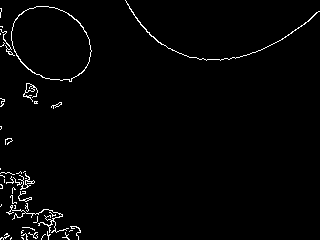

-1

In [ ]:
raw_img = cv2.imread("/content/gdrive/MyDrive/RCNNDataset/images/image858.png")

# Canny edge detector
edges = cv2.Canny(image=raw_img, threshold1=100, threshold2=200)

# Display Canny Edge Detection Image
# /data/imgs/image858.png,55,46,34,sphere
cv2_imshow(edges)

cv2.waitKey(0)


In [ ]:
image_draw.size[0]

320

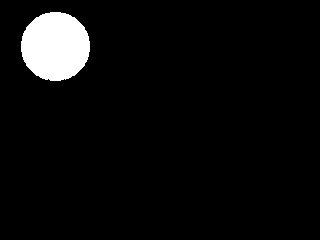

In [ ]:
from PIL import Image, ImageDraw

def add_circle(pil_img, color, center_x, center_y, radius):
    
    draw = ImageDraw.Draw(pil_img, 'L')
    for cen_x , cen_y, rad in zip(center_x ,center_y, radius):
        
        draw.ellipse((cen_x - rad, cen_y - rad, cen_x + rad, cen_y + rad), fill=255, outline=255)
    width, height = pil_img.size
    width, height = pil_img.size
    result = Image.new(pil_img.mode, (width, height))
    result.paste(pil_img)
    return result
image_draw = Image.open('/content/gdrive/MyDrive/RCNNDataset/images/image858.png')

im_new = add_circle(Image.new(mode="L", size=(320, 240)), (128, 0, 64), [55], [46], [34])
im_new



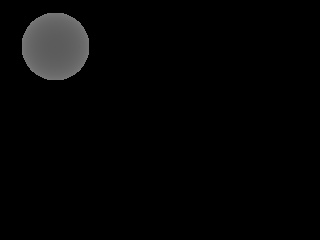

In [ ]:
im2 = Image.new('L', (320, 240))
offset =125
for x in range(320) :
    for y in range(240):
        #if (x - 55)**2 + (y - 46)**2 > 34**2:
        #    color = int(np.sqrt((x - 55)**2 + (y - 46)**2 - 34**2))
        #    im2.putpixel((x,y), color + offset)
        if (x - 55)**2 + (y - 46)**2 < 34**2:
            color = -1 * int(np.sqrt(np.abs(((x - 55)**2 + (y - 46)**2 - 34**2))))
            #print(color)
            im2.putpixel((x,y), color+ offset)
        
im2


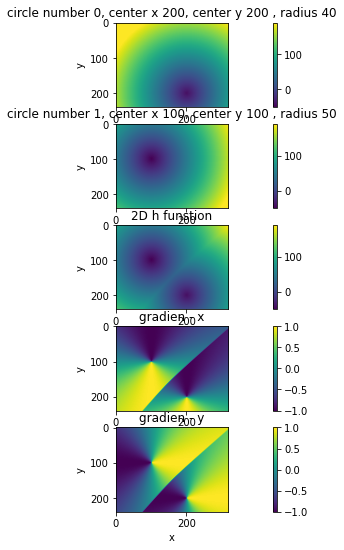

In [88]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

IM_WIDTH = 320
IM_HEIGHT = 240
def ground_truth( circles):

    gridd = np.zeros((IM_HEIGHT, IM_WIDTH, 2))
    #immi = np.zeros((320,240))
    for i in range( 0, IM_HEIGHT):
        for j in range( 0, IM_WIDTH):
            gridd[ i, j, 0] = i
            gridd[ i, j, 1] = j
    immi = np.zeros((IM_HEIGHT, IM_WIDTH, len(circles)))
    for i, [center_x, center_y, radius] in enumerate(circles):

        immi[:,:,i] = np.sqrt(np.sum((gridd - np.array([center_y, center_x]))**2, axis = -1)) - radius

    result = np.min(immi, axis = 2)

    edges_x, edges_y = np.gradient (result)

    # edges_x = np.gradient(result, axis = 0)
    # edges_y = np.gradient(result, axis = 1)


    #offset = np.min(result)
    #result2 = (result - np.min(result)) * 255 / np.max(result)
    #result2 = result.astype('uint8')

    #result2 = cv2.cvtColor(result2, cv2.COLOR_BGR2GRAY)
    #kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    #kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
    #edges_x = cv2.filter2D(result2,cv2.CV_8U,kernelx)
    #edges_y = cv2.filter2D(result2,cv2.CV_8U,kernely)

    return immi,result, edges_x, edges_y


circles = [[200,200,40], [100,100,50]]
immi, result, edges_x, edges_y = ground_truth( circles)

fig, axs = plt.subplots( len(circles) + 3 , 1, figsize=( 16, 9))
for i in range(len(circles)):
    t = axs[i].imshow(immi[:,:,i], cmap='viridis', vmin = np.min(result), vmax = np.max(result))
    fig.colorbar(t, ax = axs[i])
    axs[i].set_xlabel("x")
    axs[i].set_ylabel("y")
    axs[i].set_title(f"circle number {i}, center x {circles[i][0]}, center y {circles[i][1]} , radius {circles[i][2]}")

t_result = axs[len(circles)].imshow(result)
t_edgex= axs[len(circles)+1].imshow(edges_x)
t_edgey= axs[len(circles)+2].imshow(edges_y)

axs[len(circles)].set_xlabel("x")
axs[len(circles)].set_ylabel("y")
axs[len(circles)].set_title("2D h funstion")

axs[len(circles)+1].set_xlabel("x")
axs[len(circles)+1].set_ylabel("y")
axs[len(circles)+1].set_title("gradien - x")

axs[len(circles)+2].set_xlabel("x")
axs[len(circles)+2].set_ylabel("y")
axs[len(circles)+2].set_title("gradien - y")



fig.colorbar(t_result, ax = axs[len(circles)])
fig.colorbar(t_edgex, ax = axs[len(circles) + 1])
fig.colorbar(t_edgey, ax = axs[len(circles) + 2])
# plt.tight_layout()

# plt.imshow(result)
# plt.quiver(edges_x, edges_y)


# New Section

(24, 32)


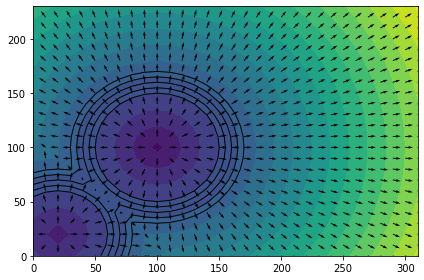

In [84]:
IM_WIDTH = 320
IM_HEIGHT = 240

## dx an dy shows grid resolution while ploting
dx = 10
dy = 10
xr = np.arange(0, IM_HEIGHT, dx)
yr = np.arange(0, IM_WIDTH, dy)

IM_HEIGHT = int(IM_HEIGHT/dx)
IM_WIDTH = int(IM_WIDTH/dx)



xx, yy = np.meshgrid (yr, xr, indexing = 'ij')
circles = [[2,2,4], [10,10,5]]
immi, result, edges_x, edges_y = ground_truth( circles)
print(result.shape)
gradx, grady = np.gradient (result.T)

n = 20
l = np.array([0.0, 0.5, 1.0, 1.5, 2.0])

plt.contourf(xx, yy, result.T, n)
plt.contour(xx, yy, result.T, levels = l, colors = 'k', linewidths = 1, linestyles = 'solid')

plt.quiver(xx, yy, gradx , grady)

# plt.subplots_adjust(left=0.1,
#                     bottom=0.5, 
#                     right=2, 
#                     top=5, 
#                     wspace=0.4, 
#                     hspace=0.4)
plt.tight_layout()



In [ ]:
circles = [[20,20,200], [100,100,50]]
circles[0][2]

200

In [89]:
uname = "golnazraja"
!git config --global user.email '$golnazraja@gmail.com'
!git config --global user.name '$golnazraja'

from getpass import getpass
password = getpass('Password:')
!git clone https://github.com/golnazraja/CBF.git
%cd myrepo
# create a file, then add it to stage
# !git add hello.txt
# !git commit -m 'commit message'  # commit in Colab
# !git push origin master          # push to github

Password:··········
Cloning into 'CBF'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
[Errno 2] No such file or directory: 'myrepo'
/content


In [90]:
!git add CBFVision.ipynb
!git commit -m '2D gradient and 2D h function done'  # commit in Colab
!git push origin master          # push to github

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
